In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 



In [108]:
X=pd.read_csv("Linear_X_Train.csv").values
Y=pd.read_csv("Linear_Y_Train.csv").values

In [109]:
u=X.mean()
std=X.std()

In [110]:
X=(X-u)/std

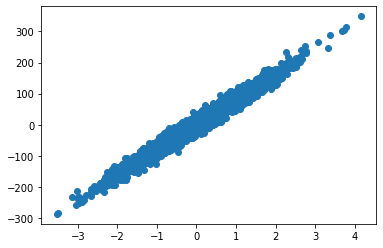

In [111]:
plt.scatter(X,Y)

In [112]:
def hypothesis(X,theta):
    
    y_=theta[0]+theta[1]*X
    return y_

In [113]:
def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    grad[0]+=sum(hypothesis(X,theta)-Y)
    grad[1]+=sum((hypothesis(X,theta)-Y)*X)
    return grad/m

In [122]:
def grd_dec(X,Y,tries=100,lr=0.1):
    theta=np.zeros((2,))
    error_l=[]
    for i in range(tries):
        grad=gradient(X,Y,theta)
        theta[0]-=lr*grad[0]
        theta[1]-=lr*grad[1]
        error_l.append(error(X,Y,theta))
    return error_l,theta

In [123]:
error_list,theta=grd_dec(X,Y)

In [124]:
print(error_list)

[array([5363.12510257]), array([4380.41289317]), array([3584.41600355]), array([2939.65852295]), array([2417.40496367]), array([1994.37958066]), array([1651.72902041]), array([1374.18206661]), array([1149.36903404]), array([967.27047765]), array([819.77064698]), array([700.29578413]), array([603.52114523]), array([525.13368772]), array([461.63984713]), array([410.20983626]), array([368.55152745]), array([334.80829731]), array([307.47628091]), array([285.33734761]), array([267.40481165]), array([252.87945752]), array([241.11392067]), array([231.58383582]), array([223.8644671]), array([217.61177843]), array([212.54710061]), array([208.44471157]), array([205.12177646]), array([202.43019901]), array([200.25002128]), array([198.48407732]), array([197.05366271]), array([195.89502687]), array([194.95653185]), array([194.19635088]), array([193.58060429]), array([193.08184956]), array([192.67785822]), array([192.35062524]), array([192.08556653]), array([191.87086897]), array([191.69696394]), ar

In [125]:
print(theta)

[ 0.6838508  79.90361453]


In [127]:
def error(X,Y,theta):
    return sum((hypothesis(X,theta)-Y)**2)/X.shape[0]
    
    

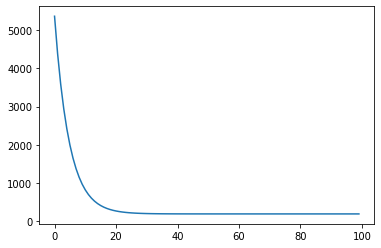

In [128]:
plt.plot(error_list)

In [132]:
X_test=pd.read_csv("Linear_X_Test.csv").values
y_=hypothesis(X_test,theta)

In [133]:

data=pd.DataFrame(y_,columns=["y"])

In [134]:
data.to_csv("Predictions.csv",index=False)